<a href="https://colab.research.google.com/github/BiniyamAFirde/Mechanical-Ventilator-Arduino/blob/main/Arduino_Uno_and_Raspberry_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time: 0.0s | Pressure: 1.236 | Motor State: High Power (8)
Time: 0.5s | Pressure: 0.857 | Motor State: High Power (8)
Time: 1.0s | Pressure: 1.23 | Motor State: High Power (8)
Time: 1.5s | Pressure: 1.279 | Motor State: High Power (8)
Time: 2.0s | Pressure: 1.033 | Motor State: Low Power (3.0)
Time: 2.5s | Pressure: 1.249 | Motor State: Low Power (3.0)
Time: 3.0s | Pressure: 0.55 | Motor State: Low Power (3.0)
Time: 3.5s | Pressure: 0.506 | Motor State: Low Power (3.0)
Time: 4.0s | Pressure: 0.797 | Motor State: Low Power (3.0)
Time: 4.5s | Pressure: 0.791 | Motor State: Low Power (3.0)
Time: 5.0s | Pressure: 1.413 | Motor State: Low Power (3.0)
Time: 5.5s | Pressure: 0.708 | Motor State: Low Power (3.0)
Time: 6.0s | Pressure: 1.012 | Motor State: Cycle Reset
Time: 6.5s | Pressure: 1.109 | Motor State: High Power (8)
Time: 7.0s | Pressure: 1.139 | Motor State: High Power (8)
Time: 7.5s | Pressure: 0.778 | Motor State: High Power (8)
Time: 8.0s | Pressure: 0.891 | Motor State: High Powe

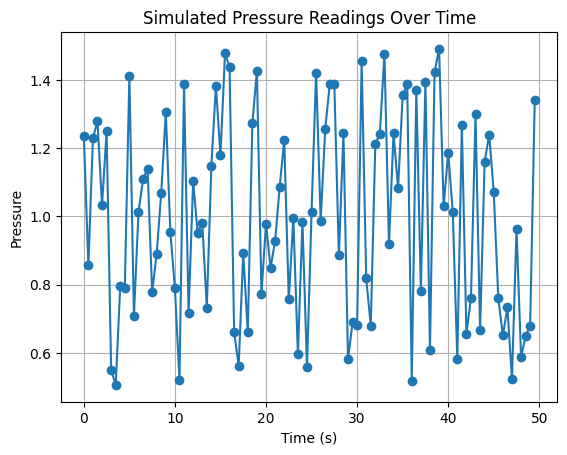

0.0	1.236
0.5	0.857
1.0	1.23
1.5	1.279
2.0	1.033
2.5	1.249
3.0	0.55
3.5	0.506
4.0	0.797
4.5	0.791
5.0	1.413
5.5	0.708
6.0	1.012
6.5	1.109
7.0	1.139
7.5	0.778
8.0	0.891
8.5	1.07
9.0	1.305
9.5	0.954
10.0	0.79
10.5	0.519
11.0	1.387
11.5	0.717
12.0	1.103
12.5	0.951
13.0	0.982
13.5	0.731
14.0	1.148
14.5	1.383
15.0	1.179
15.5	1.478
16.0	1.438
16.5	0.661
17.0	0.562
17.5	0.892
18.0	0.661
18.5	1.273
19.0	1.426
19.5	0.774
20.0	0.979
20.5	0.849
21.0	0.928
21.5	1.087
22.0	1.223
22.5	0.757
23.0	0.995
23.5	0.596
24.0	0.984
24.5	0.558
25.0	1.013
25.5	1.421
26.0	0.988
26.5	1.256
27.0	1.388
27.5	1.387
28.0	0.886
28.5	1.244
29.0	0.581
29.5	0.689
30.0	0.683
30.5	1.455
31.0	0.818
31.5	0.68
32.0	1.212
32.5	1.243
33.0	1.476
33.5	0.92
34.0	1.244
34.5	1.082
35.0	1.355
35.5	1.388
36.0	0.518
36.5	1.371
37.0	0.781
37.5	1.395
38.0	0.607
38.5	1.423
39.0	1.491
39.5	1.03
40.0	1.187
40.5	1.013
41.0	0.582
41.5	1.267
42.0	0.656
42.5	0.761
43.0	1.299
43.5	0.666
44.0	1.16
44.5	1.24
45.0	1.071
45.5	0.76
46.0	0.651
46.5	0.

In [1]:
# Google Colab: Simulating Serial Communication & GPIO Behavior

import time
import numpy as np
import matplotlib.pyplot as plt

# Simulated Data (Replace with actual Serial data in a Raspberry Pi setup)
def get_mock_pressure_reading():
    """
    Simulates pressure readings from a ventilator.
    Replace this function with real serial communication in Raspberry Pi.
    """
    return np.random.uniform(0.5, 1.5)  # Simulated sensor values

# Simulation Variables
xs = []  # Time values
ys = []  # Pressure values
h = 0.5  # Time step (sampling rate)
j1 = 0
k = 0
aux1 = 3  # Default I:E ratio
fr = 10  # Default Frequency Rate (Breaths Per Minute)

# Open file for data logging (Simulated in Colab)
file_path = "/content/Datos3.txt"  # Change path if needed
f = open(file_path, "w")

# Simulated Loop for Data Collection
try:
    while k < 100:  # Simulated 100 iterations instead of infinite loop
        x1 = get_mock_pressure_reading()  # Simulated pressure reading
        x2 = round(x1, 3)

        # Store data
        xs.append(k * h)
        ys.append(x2)
        f.write(f"{round(k * h, 3)}\t{round(x2, 3)}\n")

        # DC Motor Control Logic (Simulation)
        j1 += h
        if j1 <= (60 / (aux1 * fr)):
            motor_state = "High Power (8)"
        elif (60 / (aux1 * fr)) < j1 <= (60 / fr):
            motor_state = "Low Power (3.0)"
        elif j1 > (60 / fr):
            motor_state = "Cycle Reset"
            j1 = 0  # Reset cycle

        print(f"Time: {round(k*h, 2)}s | Pressure: {x2} | Motor State: {motor_state}")

        time.sleep(0.1)  # Reduced for simulation
        k += 1

    # Close file
    f.close()

except KeyboardInterrupt:
    print("Process interrupted. Stopping...")
    f.close()

# Plot Results
plt.plot(xs, ys, marker='o', linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Pressure")
plt.title("Simulated Pressure Readings Over Time")
plt.grid()
plt.show()

# Display logged data
with open(file_path, "r") as file:
    print(file.read())